# Testing and examples for aslmcg function

The function `aslmcg` computes adjoint spheroidals usiung a spherical harmonic expansion.

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
from matplotlib.pyplot import *
from numpy import *
from positive import *

(positive)>> Applying custom matplotlib settings.


In [2]:
?aslmcg

Signature: aslmcg(a, s, l, m, n, theta, phi, kerr=True, lmin=None, lmax=None, span=6)
Docstring:
Compute adjoint spheroidal harmonic functoin using the spherical harmonic clensch-gordan method. By default, kerr adjoint functions are computed.
londonl@mit.edu 2020
File:      ~/JOKI/Libs/KOALA/positive_dev/positive/physics.py
Type:      function


In [28]:
a = 0.96
s,l,m,n = -2,2,2,0
theta = linspace(0,pi,int(2**9))[1:-1]
phi = 0

cw,A1 = leaver(a,l,m,n)
aw = a*cw

# Compute adjoint spheroidal using spheroidal expansion as a check
foo = slm_dual_set( a, l, m, n, theta, phi, s=s, lmax=8 )

In [82]:
bar = aslmcg( a, s, l, m, n, theta, phi )

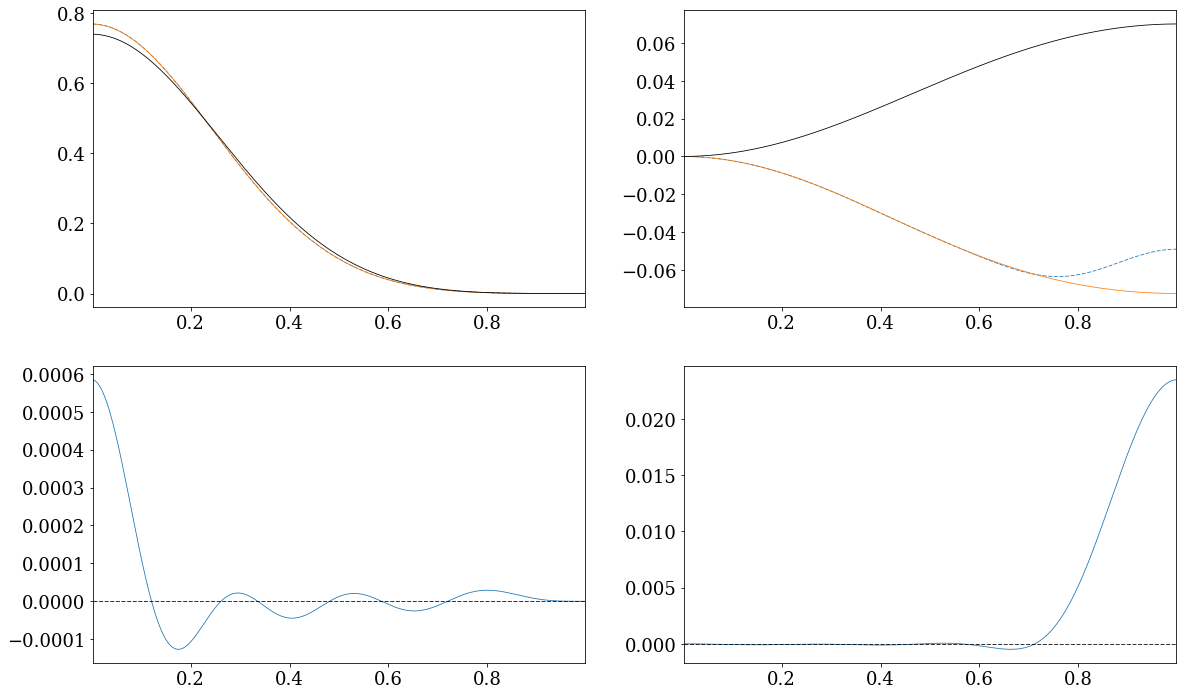

In [86]:

ll = l+0

S = bar['Slm'][ll]
aS1 = foo['AdjSlm'][ ll ]
aS2 = bar['AdjSlm'][ ll ]
u = theta/pi
pha = lambda x: unwrap( angle(x) )-unwrap( angle(x) )[0]

fig = figure( figsize=3*figaspect(0.618) )

subplot(2,2,1)
plot( u, abs(aS1),ls='--' )
plot( u, abs(aS2) )
plot( u, abs(S), color='k',ls='-' )
xlim( lim(u) )

subplot(2,2,2)
plot( u, pha(aS1),ls='--' )
plot( u, pha(aS2) )
plot( u, pha(S), color='k',ls='-' )
xlim( lim(u) );

subplot(2,2,3)
plot( u, abs(aS1)-abs(aS2) )
plot( u, abs(S)*0, color='k',ls='--' )
xlim( lim(u) )

subplot(2,2,4)
plot( u, pha(aS1)-pha(aS2) )
plot( u, pha(S)*0, color='k',ls='--' )
xlim( lim(u) );

In [31]:
print(bar.keys())
print(foo.keys())

dict_keys(['Ylm', 'AdjSlm', 'lnspace', 'Yspace', 'aSspace', 'YSGramian', 'overtone_index'])
dict_keys(['Slm', 'AdjSlm', 'lnspace', 'Sspace', 'aSspace', 'SGramian'])


In [38]:
# foo['Slm']

In [57]:
x = zeros_like(bar['YSGramian'])
for aa in range(len(bar['lnspace'])):
    for bb in range(len(bar['lnspace'])):
        S  = bar['Slm'][bar['lnspace'][aa]] 
        aS = bar['AdjSlm'][bar['lnspace'][bb]]
        x[aa,bb] = prod( S, aS, theta )

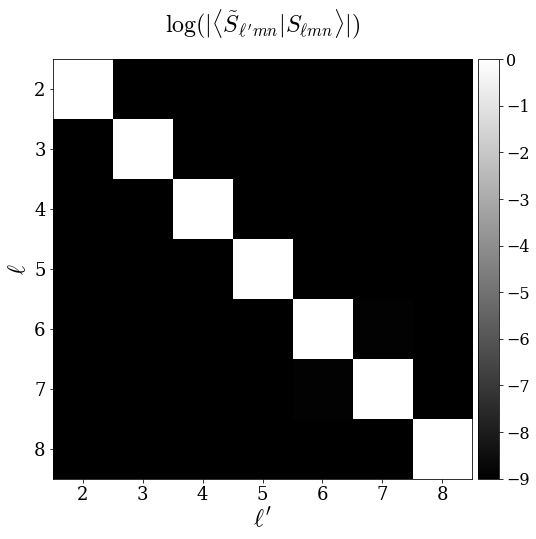

In [89]:
from matplotlib.pyplot import cm

def plotipmat(X,filepath,title_string=None,save=True):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    fig = figure( figsize=2*figaspect(1) )
    ax = gca()
    matshow(log(abs(X)),fignum=False,cmap=cm.gray)
    Z = log(abs(X))
    ax.xaxis.tick_bottom()
    ax.set_xticklabels( arange(0,X.shape[0]+1)+1 )
    ax.set_yticklabels( arange(0,X.shape[-1]+1)+1 )
    xlabel('$\ell\'$')
    ylabel('$\ell$')
    title(title_string)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    cb = colorbar(cax=cax)
    cb.ax.tick_params(labelsize=16)
    clim(0,-9)
    #if save: alert('Saving to: %s'%yellow(filepath))
    #if save: savefig(filepath,pad_inches=0)
    return fig

#
filepath = '/Users/book/KOALA/spheroidal_imr/paper/biorthog_a%1.2f_m%i.pdf'%(a,m)
filepath = filepath.replace('0.','0p')
title_string = r"$ \log( | \langle \tilde{S}_{\ell' m n} | S_{\ell m n} \rangle | )$"
plotipmat(x,filepath,title_string);